# Import Statements

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime
from datetime import timedelta
import math
import random
import timeit

---

In [174]:
marburg = pd.read_pickle("../0_data/marburg_clean.pkl")
duisburg = pd.read_pickle('../0_data/duisburg_clean.pkl')
marburg_weather = pd.read_pickle("../0_data/weather/marburg_weather.pkl")
duisburg_weather = pd.read_pickle("../0_data/weather/duisburg_weather.pkl")

# Radial Basis Function

In [184]:
def rbf_feat(x, mu, sig):
    return np.hstack([np.exp(-(x[:,None] - mu)**2/(2*sig**2)), np.ones((len(x),1))])

In [197]:
def train_rbf(x, y, n_rbf):
    min_x, max_x = x.min(), x.max()
    sig = (max_x - min_x)/(n_rbf-1)
    mu = np.linspace(min_x, max_x, n_rbf-1)
    
    Phi = rbf_feat(x, mu, sig)
    theta = np.linalg.solve(Phi.T @ Phi, Phi.T @ y)
    return theta, mu, sig

In [198]:
def plot_regression_rbf(theta, mu, sig):
    xt = np.linspace(0,365, 400)
    yt = rbf_feat(xt, mu, sig) @ theta
    
    plt.figure(figsize = (8,6))
    plt.scatter(xp, yp, marker="x")
    ylim = plt.ylim()
    plt.plot(xt, yt, 'C1')
    plt.xlabel("Day of year")
    plt.ylabel("Peak Demand")               

In [223]:
def train_rbf_moket(x, y, n_rbf):
    min_x, max_x = x.min(), x.max()
    sig = (max_x - min_x)/(n_rbf-1)
    mu = np.linspace(min_x, max_x, n_rbf-1)
    print(mu)
    print(x)
    print(sig)
    mu = [mu, mu]    
    print(mu)
    return np.hstack([np.exp(-(x.T - mu).T@(x.T - mu)/(2*sig**2)), np.ones((len(x),1))])

In [224]:
xtest = np.array([[0,1,2,3,4,5,6,7,8,9],[9,8,6,4,4,5,6,7,8,9]])
ytest = np.array([0,1,2,3,4,5,6,7,8,9])

In [225]:
train_rbf_moket(xtest, ytest, 4)

[0.  4.5 9. ]
[[0 1 2 3 4 5 6 7 8 9]
 [9 8 6 4 4 5 6 7 8 9]]
3.0
[array([0. , 4.5, 9. ]), array([0. , 4.5, 9. ])]


ValueError: operands could not be broadcast together with shapes (10,2) (2,3) 

## Marburg

In [141]:
# peak demand
yp = marburg.resample('H').count()["day"]
# day of year
xp = yp.index.map(lambda datetime : datetime.dayofyear)

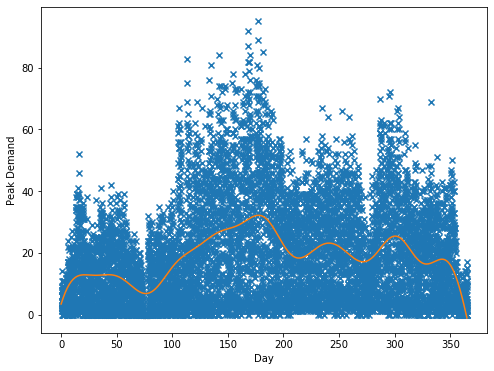

In [142]:
plot_regression_rbf(*train_rbf(xp.values, yp.values, 20))

## Duisburg

In [143]:
# peak demand
yp = duisburg.resample('H').count()["day"]
# day of year
xp = yp.index.map(lambda datetime : datetime.dayofyear)

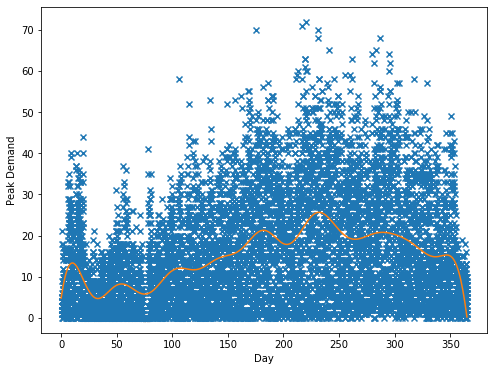

In [144]:
plot_regression_rbf(*train_rbf(xp.values, yp.values, 20))